### 필요한 라이브러리 불러오기

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### url 변수에 크롤링할 홈페이지 주소 가져오기 

In [8]:
url = "http://www.lotteria.com/menu/Menu_All.asp"

### 해당 url의 html을 불러오기 + HTML 분석하고 파싱

In [9]:
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

### 원하는 정보 크롤링하기 - menu_list, kcal_list, price_list 라는 3가지 리스트에 각각 모든 메뉴, 칼로리, 가격 정보 모두 넣기(단 kcal, 원 단위는 생략)

In [13]:
menu_list = []
kcal_list = []
price_list = []

for i in range(1, 20):
    results = soup.select(f"#frmNavi > div > ul > li:nth-child({i}) > div+div")
    for j in results:
        data = j.text.split('\n')
        menu_list.append(data[3])
        kcal_list.append(data[4][:-4])
        price_list.append(data[5][:-1])
print(menu_list)
print(kcal_list)
print(price_list)
print(len(menu_list))
print(len(kcal_list))
print(len(price_list))
    
#select_one, select, find, find_all 4가지 연산자 중 선택하여 사용하면 됩니다.

['핫클라쓰 세트', '1인혼닭 세트', '핫클라쓰', '1인혼닭', '찐氷', '아이스티', '마일드클라쓰 세트', '패밀리팩', '마일드클라쓰', '치킨휠레 (4조각)', '치즈인더에그', '아이스 아메리카노 L', '리아미라클버거 세트', '치킨풀팩', '리아미라클버거', '화이어윙 (2조각)', '지파이 하바네로(L)', '핫초코', '와규 에디션Ⅱ 세트', '치킨하프팩', '와규 에디션Ⅱ', '화이어윙 (4조각)', '지파이 고소한맛(S)', '오렌지주스 (400ml PET)', '더블X2 세트', '순살치킨 풀팩', '더블X2', '치킨1조각', '치킨 너겟', '우유', '새우버거 세트', '순살치킨 하프팩', '새우버거', '치킨휠레 (2조각)', '롱 치즈스틱(1조각)', '사이다(R)', '치킨버거 세트', '치킨버거', '콘샐러드', '콜라(R)', 'T-Rex 버거 세트', 'T-Rex', '선데아이스크림(스트로베리)', '밀크쉐이크(딸기)', 'AZ버거 세트', '클래식 치즈버거', '쉑쉑치킨(칠리)', '밀크쉐이크(초코)', '클래식 치즈버거 세트', '한우불고기', '쉑쉑치킨(치즈)', '밀크쉐이크(바닐라)', '한우연인팩', '모짜렐라 인 더 버거 - 베이컨', '쉑쉑치킨(어니언)', '아메리카노', '한우불고기 콤보', 'AZ버거', '양념감자', '아이스 아메리카노', '한우불고기 세트', '원조 빅불', '오징어링', '카페라떼', '한우명품팩', '핫크리스피버거', '치즈스틱', '아이스 카페라떼', '모짜렐라 인 더 버거 베이컨 세트', '불고기버거', '포테이토', '레몬에이드', '원조 빅불 세트', '데리버거', '토네이도(초코쿠키)', '핫크리스피버거세트', '토네이도(녹차)', '데리버거 세트', '토네이도(스트로베리)', '불고기버거 세트', '소프트콘']
['1,231', '801', '837', '581', '530', '160', '1,095', '1,712', '701', '366', '183', '55'

### 가져온 정보(3개의 리스트)를 딕셔너리 형태로 만들기(칼럼명, 순서는 'menu', 'kcal', 'price') + 데이터프레임으로 만들어 5줄만 나타내기 (칼럼 순서 지켜야 함!)

In [14]:
lot_dict = {'menu':menu_list, 'kcal': kcal_list, 'price': price_list}
df = pd.DataFrame(lot_dict)
df.head(5)

,menu,kcal,price
0,핫클라쓰 세트,"1,231","7,200"
1,1인혼닭 세트,801,"11,500"
2,핫클라쓰,837,"5,400"
3,1인혼닭,581,"10,000"
4,찐氷,530,"3,800"


### test 폴더에 csv파일로 저장 (파일이름은 '롯데리아메뉴', 엑셀 파일을 열었을 때 한글이 깨지지 않고, 인덱스 없이 저장하기)

In [15]:
df.to_csv('롯데리아메뉴.csv',encoding='euc-kr', index=False)

### df 변수에 저장했던 csv파일 불러오기, 옵션에 thousands=',' 추가하여 천 단위 표현(,)생략 + 5줄 나타내기

In [16]:
df = pd.read_csv('롯데리아메뉴.csv', encoding='euc-kr', thousands=',')
df.head(5)

,menu,kcal,price
0,핫클라쓰 세트,1231,7200
1,1인혼닭 세트,801,11500
2,핫클라쓰,837,5400
3,1인혼닭,581,10000
4,찐氷,530,3800


### df의 총 데이터 건수, 데이터 타입, Null 건수를 한 번에 알아보기

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
menu     81 non-null object
kcal     81 non-null int64
price    81 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


### df의 'menu' 칼럼명을 '메뉴'로 수정하기

In [18]:
df = df.rename(columns={'menu':'메뉴'})
df.head(5)

,메뉴,kcal,price
0,핫클라쓰 세트,1231,7200
1,1인혼닭 세트,801,11500
2,핫클라쓰,837,5400
3,1인혼닭,581,10000
4,찐氷,530,3800


### df의 인덱스를 확인하기

In [19]:
df.index

RangeIndex(start=0, stop=81, step=1)

### (loc, iloc 명령 중 선택하여 사용) df의 인덱스를 확인하여 맨 마지막 그 다음 행(81번째 행)에 '메뉴'는 '오미자에이드', 'kcal'는 140, 'price'는 3000 정보를 가진 행 추가하기 + 맨 마지막 행 확인하기

In [20]:
df.loc[81] = ['오미자에이드', '140', '3000']
df.loc[81]

메뉴       오미자에이드
kcal        140
price      3000
Name: 81, dtype: object

### df를 복사하여 df2라는 새로운 데이터프레임 만들기

In [21]:
df2= df.copy()

### df2 에 '만족도'라는 새로운 칼럼을 만들어  '만족도' 값이 모두 NaN값을 가지도록 하기 + 5줄 나타내기

In [22]:
df2['만족도'] = np.nan
df2.head(5)

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,1인혼닭 세트,801,11500,NaN
2,핫클라쓰,837,5400,NaN
3,1인혼닭,581,10000,NaN
4,찐氷,530,3800,NaN


### g_index라는 변수에 kcal가 500미만이고, price가 5000 이하인 인덱스를 저장하기 + 인덱스가 g_index인 '만족도' 값을 모두 5로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [23]:
df['kcal'] = df['kcal'].astype(int)
df['price'] = df['price'].astype(int)
g_index = df[(df['kcal'] < 500) & (df['price'] <= 5000)].index
# len(g_index)
for x in g_index:
    df2.iloc[x, 3] = 5
df2.head(10)

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,1인혼닭 세트,801,11500,NaN
2,핫클라쓰,837,5400,NaN
3,1인혼닭,581,10000,NaN
4,찐氷,530,3800,NaN
5,아이스티,160,2200,5.0
6,마일드클라쓰 세트,1095,6300,NaN
7,패밀리팩,1712,13600,NaN
8,마일드클라쓰,701,4300,NaN
9,치킨휠레 (4조각),366,4500,5.0


### s_index라는 변수에 kcal가 500이상, 1000미만인 인덱스를 저장하기 + 인덱스가 s_index인 '만족도' 값을 모두 3로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [24]:
s_index = df[(df['kcal'] >= 500) & (df['kcal'] < 1000)].index
# len(g_index)
for x in s_index:
    df2.iloc[x, 3] = 3
df2.head(10)

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,NaN
1,1인혼닭 세트,801,11500,3.0
2,핫클라쓰,837,5400,3.0
3,1인혼닭,581,10000,3.0
4,찐氷,530,3800,3.0
5,아이스티,160,2200,5.0
6,마일드클라쓰 세트,1095,6300,NaN
7,패밀리팩,1712,13600,NaN
8,마일드클라쓰,701,4300,3.0
9,치킨휠레 (4조각),366,4500,5.0


### b_index라는 변수에 kcal가 1000이상인 인덱스를 저장하기 + 인덱스가 b_index인 '만족도' 값을 모두 1로 만들기 (loc, iloc 명령 중 선택하여 사용)

In [25]:
b_index = df[(df['kcal'] >= 1000)].index
# len(g_index)
for x in b_index:
    df2.iloc[x, 3] = 1
df2.head(10)

,메뉴,kcal,price,만족도
0,핫클라쓰 세트,1231,7200,1.0
1,1인혼닭 세트,801,11500,3.0
2,핫클라쓰,837,5400,3.0
3,1인혼닭,581,10000,3.0
4,찐氷,530,3800,3.0
5,아이스티,160,2200,5.0
6,마일드클라쓰 세트,1095,6300,1.0
7,패밀리팩,1712,13600,1.0
8,마일드클라쓰,701,4300,3.0
9,치킨휠레 (4조각),366,4500,5.0


### df2의 각각의 칼럼에 총 몇 개의 NaN을 가지고 있는지 한 번에 나타내기

In [26]:
df2.isna().sum()

메뉴       0
kcal     0
price    0
만족도      1
dtype: int64

### df2의 '만족도' 칼럼이 NaN인 행의 데이터 찾기

In [27]:
df2[df2['만족도'].isnull()]

,메뉴,kcal,price,만족도
20,와규 에디션Ⅱ,497,5800,NaN


### df2가 갖고 있는 결손 데이터 삭제하기 + 삭제가 잘 되었는지 확인하기  

In [28]:
df2 = df2.dropna()
df2.isna().sum()

메뉴       0
kcal     0
price    0
만족도      0
dtype: int64

### df를 'price'가 높은 순서대로 정렬하여 'high_price'라는 새로운 데이터프레임으로 저장하기 + high_price 데이터 프레임의 인덱스를 '메뉴'로 바꾸기 + high_price 상위 7줄 나타내기

In [29]:
high_price = df.sort_values(by='price', ascending=False)
high_price.set_index('메뉴', inplace = True)
high_price.head(7)

,kcal,price
메뉴,,
치킨풀팩,2590,18800
순살치킨 풀팩,1477,15900
한우명품팩,1830,15600
한우연인팩,1714,13900
패밀리팩,1712,13600
1인혼닭 세트,801,11500
1인혼닭,581,10000


### matplotlib을 사용하여 시각화하기

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

#윈도우
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

#맥
#rc('font', family='AppleGothic')

### 시각화 조건
figure 크기는 (10,10)

plt.scatter을 사용하여 데이터를 점으로 나타내기, x축 값은 df['kcal'], y축 값은 df['price'], 점의 사이즈는 50, 마커 모양은 별모양, 색깔은 초록색

제목은 '롯데리아 메뉴'

x축 제목은 '칼로리'

y축 제목은 '가격'

y축 범위는 0~20000

high_price 데이터 프레임을 사용하여 가격이 높은 상위 7개 메뉴 글자로 나타내기

시각화 한 차트를 현재경로(test폴더)에 png 형식으로 저장하기 (파일명: '롯데리아메뉴_학년반번호이름')
ex) 롯데리아메뉴_3221임은영

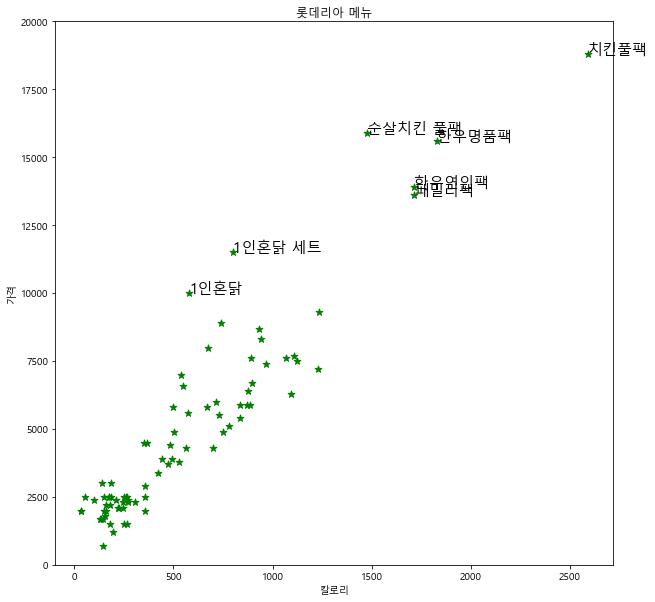

In [39]:
plt.figure(figsize = (10,10))
plt.scatter(df['kcal'], df['price'], s=50, marker='*', color = 'g')
plt.title('롯데리아 메뉴')
plt.xlabel('칼로리')
plt.ylabel('가격')
plt.ylim(0,20000)

for i in range(7):
    plt.text(high_price['kcal'][i], high_price['price'][i], high_price.index[i], fontsize=15)
    
plt.savefig('롯데리아메뉴_3209양현승.png')